# Testing of $GF(2^4)$ S-Boxes
Author:Sukhsagar Dubey

Advisor: Dr. Utsav Banerjee

Project:Implementation of Quantum Circuits for Cryptanalysis and Signal Processing Applications

In [2]:
import numpy as np

#Importing standard Qiskit libraries
from qiskit import quantum_info
import qiskit
from qiskit import QuantumCircuit,transpile,Aer,IBMQ,QuantumRegister,ClassicalRegister,execute
from qiskit.tools.jupyter import*
from qiskit.visualization import*
from qiskit.quantum_info.operators import Operator, Pauli
#from ibm_quantum_widgets import*
#from qiskit.providers.aer import QasmSimulator
#from qiskit import Aer
#Loading your IBM Quantum account(s)
#provider=IBMQ.load_account()
simulator=Aer.get_backend('qasm_simulator')

In [3]:
# Python code to convert from Binary
# to Hexadecimal using int() and hex()
def binToHexa(n):
    # convert binary to int
    num = int(n, 2)  
    # convert int to hexadecimal
    hex_num = hex(num)
    return(hex_num)

In [3]:
#Function to give truth table from quantum circuit-
def truth_table(qc,n,t,op_lst):
    '''
    n #number of input (ex n=8 )
    t: total qubit
    qc: testing of quantum circuit
    out_lst: output list (list of label of output qubits) for measurement
    ''' 
    dct={}
    for i in range(2**n):
        ckt1=QuantumCircuit(t,len(op_lst))
        inp=bin(i)[2:].zfill(n)
        for j in range(len(inp)):
            if inp[j]=='1':
                ckt1.x(n-j-1)        
        ckt1.barrier()
        ckt1=ckt1.compose(qc)
        #print(ckt1)
        ckt1.measure(op_lst,list(np.arange(len(op_lst))))
        backend=Aer.get_backend('qasm_simulator')
        job=execute(ckt1,backend, shots=1024)
        result=job.result().get_counts()
        
        dct[str(i)]=binToHexa(list(result)[0])[2:]
    print(ckt1)    
    return(dct)

## MI-9

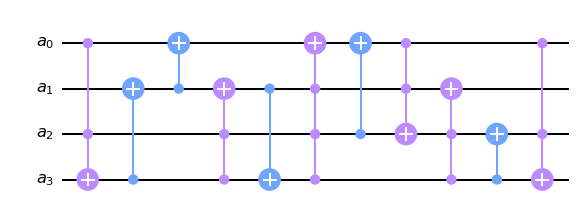

In [34]:
#MI 9 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.ccx(0,2,3)
qc.cx([3,1],[1,0])
qc.ccx(3,2,1)
qc.cx(1,3)
qc.mcx([1,2,3],0)
qc.cx(2,0)
qc.ccx(0,1,2)
qc.ccx(3,2,1)
qc.cx(3,2)
qc.ccx(0,2,3)

MI_c=qc.to_gate(label='MI')  
qc.draw('mpl')


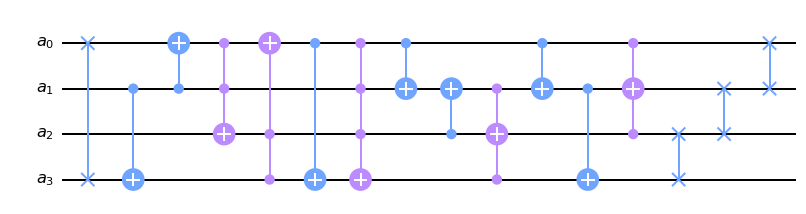

In [46]:
#MI 9 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,3)
qc.cx([1,1],[3,0])
qc.ccx(1,0,2)
qc.ccx(3,2,0)
qc.cx(0,3)
qc.mcx([0,1,2],3)
qc.cx(0,1)
qc.cx(2,1)
qc.ccx(3,1,2)
qc.cx(0,1)
qc.cx(1,3)
qc.ccx(2,0,1)
qc.swap(3,2)
qc.swap(2,1)
qc.swap(1,0)

MI_9=qc.to_gate(label='MI')  
qc.draw('mpl')

In [33]:
op=truth_table(MI_9,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="019edb76f2c5a438")

     ┌───┐ ░ ┌─────┐┌─┐         
q_0: ┤ X ├─░─┤0    ├┤M├─────────
     ├───┤ ░ │     │└╥┘┌─┐      
q_1: ┤ X ├─░─┤1    ├─╫─┤M├──────
     ├───┤ ░ │  MI │ ║ └╥┘┌─┐   
q_2: ┤ X ├─░─┤2    ├─╫──╫─┤M├───
     ├───┤ ░ │     │ ║  ║ └╥┘┌─┐
q_3: ┤ X ├─░─┤3    ├─╫──╫──╫─┤M├
     └───┘ ░ └─────┘ ║  ║  ║ └╥┘
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3 
dict_values(['0', '1', '9', 'e', 'd', 'b', '7', '6', 'f', '2', 'c', '5', 'a', '4', '3', '8'])
True


## MI-10

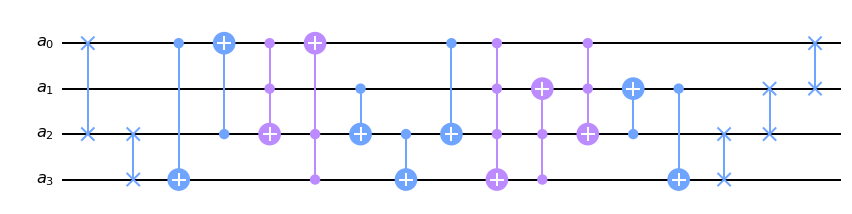

In [62]:
#MI 10 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,2)
qc.swap(2,3)
qc.cx([0,2],[3,0])
qc.ccx(1,0,2)
qc.ccx(3,2,0)
qc.cx([1,2,0],[2,3,2])
qc.mcx([0,1,2],3)
qc.ccx(3,2,1)
qc.ccx(1,0,2)
qc.cx(2,1)
qc.cx(1,3)

qc.swap(3,2)
qc.swap(2,1)
qc.swap(1,0)

MI_10=qc.to_gate(label='MI')  
qc.draw('mpl')

In [58]:
op=truth_table(MI_10,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="01c86f4e3dba2975")

     ┌───┐ ░ ┌─────┐┌─┐         
q_0: ┤ X ├─░─┤0    ├┤M├─────────
     ├───┤ ░ │     │└╥┘┌─┐      
q_1: ┤ X ├─░─┤1    ├─╫─┤M├──────
     ├───┤ ░ │  MI │ ║ └╥┘┌─┐   
q_2: ┤ X ├─░─┤2    ├─╫──╫─┤M├───
     ├───┤ ░ │     │ ║  ║ └╥┘┌─┐
q_3: ┤ X ├─░─┤3    ├─╫──╫──╫─┤M├
     └───┘ ░ └─────┘ ║  ║  ║ └╥┘
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3 
dict_values(['0', '1', 'c', '8', '6', 'f', '4', 'e', '3', 'd', 'b', 'a', '2', '9', '7', '5'])
True


## MI-11

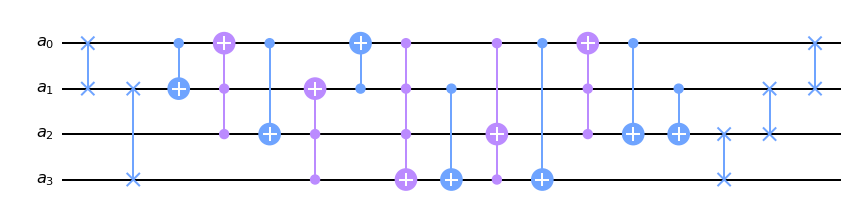

In [4]:
#MI 11 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,1)
qc.swap(1,3)
qc.cx(0,1)
qc.ccx(1,2,0)
qc.cx(0,2)
qc.ccx(3,2,1)
qc.cx(1,0)
qc.mcx([0,1,2],3)
qc.cx(1,3)
qc.ccx(0,3,2)
qc.cx(0,3)
qc.ccx(1,2,0)
qc.cx(0,2)
qc.cx(1,2)

qc.swap(3,2)
qc.swap(2,1)
qc.swap(1,0)

MI_11=qc.to_gate(label='MI')  
qc.draw('mpl')

In [60]:
op=truth_table(MI_11,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="01fa8659473edcb2")

     ┌───┐ ░ ┌─────┐┌─┐         
q_0: ┤ X ├─░─┤0    ├┤M├─────────
     ├───┤ ░ │     │└╥┘┌─┐      
q_1: ┤ X ├─░─┤1    ├─╫─┤M├──────
     ├───┤ ░ │  MI │ ║ └╥┘┌─┐   
q_2: ┤ X ├─░─┤2    ├─╫──╫─┤M├───
     ├───┤ ░ │     │ ║  ║ └╥┘┌─┐
q_3: ┤ X ├─░─┤3    ├─╫──╫──╫─┤M├
     └───┘ ░ └─────┘ ║  ║  ║ └╥┘
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3 
dict_values(['0', '1', 'f', 'a', '8', '6', '5', '9', '4', '7', '3', 'e', 'd', 'c', 'b', '2'])
True


## MI-1

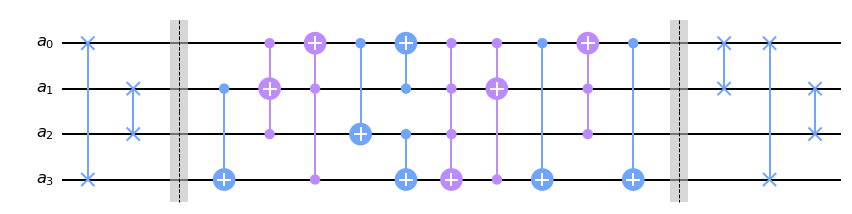

In [7]:
#MI 1 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,3)
qc.swap(1,2)
qc.barrier()
qc.cx(1,3)
qc.ccx(2,0,1)
qc.ccx(3,1,0)
qc.cx([0,1,2],[2,0,3])
qc.mcx([0,1,2],3)
qc.ccx(3,0,1)
qc.cx(0,3)
qc.ccx(2,1,0)
qc.cx(0,3)
qc.barrier()
qc.swap(0,1)
qc.swap(0,3)
qc.swap(1,2)
MI_1=qc  
qc.draw('mpl')



In [5]:
op=truth_table(MI_1,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="0132fc9ba6875ed4")

     ┌───┐ ░                 ┌───┐     ┌───┐               ┌───┐              »
q_0: ┤ X ├─░──X───────────■──┤ X ├──■──┤ X ├──■────■────■──┤ X ├──■───X──X────»
     ├───┤ ░  │         ┌─┴─┐└─┬─┘  │  └─┬─┘  │  ┌─┴─┐  │  └─┬─┘  │   │  │    »
q_1: ┤ X ├─░──┼──X───■──┤ X ├──■────┼────■────■──┤ X ├──┼────■────┼───X──┼──X─»
     ├───┤ ░  │  │   │  └─┬─┘  │  ┌─┴─┐       │  └─┬─┘  │    │    │      │  │ »
q_2: ┤ X ├─░──┼──X───┼────■────┼──┤ X ├──■────■────┼────┼────■────┼──────┼──X─»
     ├───┤ ░  │    ┌─┴─┐       │  └───┘┌─┴─┐┌─┴─┐  │  ┌─┴─┐     ┌─┴─┐    │ ┌─┐»
q_3: ┤ X ├─░──X────┤ X ├───────■───────┤ X ├┤ X ├──■──┤ X ├─────┤ X ├────X─┤M├»
     └───┘ ░       └───┘               └───┘└───┘     └───┘     └───┘      └╥┘»
c: 4/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            3 »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«q_3: ─╫

## MI-2

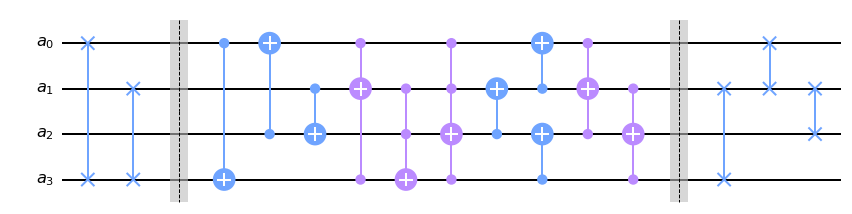

In [10]:
#MI 2 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,3)
qc.swap(1,3)
qc.barrier()

qc.cx(0,3)
qc.cx(2,0)
qc.cx(1,2)
qc.ccx(3,0,1)
qc.ccx(2,1,3)
qc.mcx([0,1,3],2)
qc.cx([2,3,1],[1,2,0])
qc.ccx(2,0,1)
qc.ccx(3,1,2)

qc.barrier()
qc.swap(1,3)
qc.swap(0,1)
qc.swap(1,2)
MI_2=qc  
qc.draw('mpl')

In [11]:
op=truth_table(MI_2,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="0132a8ed5b49f76c")

     ┌───┐ ░        ░      ┌───┐                         ┌───┐           ░    »
q_0: ┤ X ├─░──X─────░───■──┤ X ├───────■─────────■───────┤ X ├──■────────░────»
     ├───┤ ░  │     ░   │  └─┬─┘     ┌─┴─┐       │  ┌───┐└─┬─┘┌─┴─┐      ░    »
q_1: ┤ X ├─░──┼──X──░───┼────┼────■──┤ X ├──■────■──┤ X ├──■──┤ X ├──■───░──X─»
     ├───┤ ░  │  │  ░   │    │  ┌─┴─┐└─┬─┘  │  ┌─┴─┐└─┬─┘┌───┐└─┬─┘┌─┴─┐ ░  │ »
q_2: ┤ X ├─░──┼──┼──░───┼────■──┤ X ├──┼────■──┤ X ├──■──┤ X ├──■──┤ X ├─░──┼─»
     ├───┤ ░  │  │  ░ ┌─┴─┐     └───┘  │  ┌─┴─┐└─┬─┘     └─┬─┘     └─┬─┘ ░  │ »
q_3: ┤ X ├─░──X──X──░─┤ X ├────────────■──┤ X ├──■─────────■─────────■───░──X─»
     └───┘ ░        ░ └───┘               └───┘                          ░    »
c: 4/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌─┐      
«q_0: ─X────┤M├──────
«      │    └╥┘┌─┐   
«q_1: ─X──X──╫─┤M├───
«         │  ║ └╥┘┌─┐
«q_2: ────

## MI-3

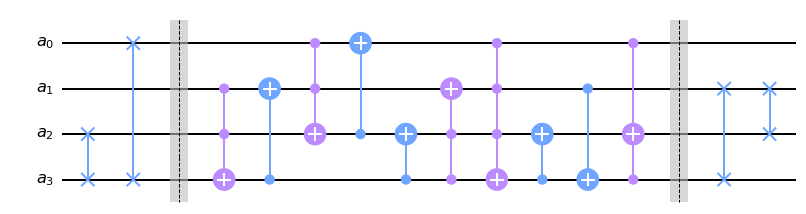

In [28]:
#MI 3 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(2,3)
qc.swap(0,3)
qc.barrier()

qc.ccx(2,1,3)
qc.cx(3,1)
qc.ccx(1,0,2)
qc.cx(2,0)
qc.cx(3,2)
qc.ccx(3,2,1)
qc.mcx([0,1,2],3)
qc.cx([3,1],[2,3])
qc.ccx(3,0,2)

qc.barrier()
qc.swap(3,1)
qc.swap(1,2)
MI_3=qc  
qc.draw('mpl')

In [29]:
op=truth_table(MI_3,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="04c81aed3b59276f")

     ┌───┐ ░        ░                ┌───┐                               ░    »
q_0: ┤ X ├─░─────X──░─────────────■──┤ X ├────────────■──────────────■───░────»
     ├───┤ ░     │  ░      ┌───┐  │  └─┬─┘     ┌───┐  │              │   ░    »
q_1: ┤ X ├─░─────┼──░───■──┤ X ├──■────┼───────┤ X ├──■─────────■────┼───░──X─»
     ├───┤ ░     │  ░   │  └─┬─┘┌─┴─┐  │  ┌───┐└─┬─┘  │  ┌───┐  │  ┌─┴─┐ ░  │ »
q_2: ┤ X ├─░──X──┼──░───■────┼──┤ X ├──■──┤ X ├──■────■──┤ X ├──┼──┤ X ├─░──┼─»
     ├───┤ ░  │  │  ░ ┌─┴─┐  │  └───┘     └─┬─┘  │  ┌─┴─┐└─┬─┘┌─┴─┐└─┬─┘ ░  │ »
q_3: ┤ X ├─░──X──X──░─┤ X ├──■──────────────■────■──┤ X ├──■──┤ X ├──■───░──X─»
     └───┘ ░        ░ └───┘                         └───┘     └───┘      ░    »
c: 4/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐         
«q_0: ┤M├─────────
«     └╥┘   ┌─┐   
«q_1: ─╫──X─┤M├───
«      ║  │ └╥┘┌─┐
«q_2: ─╫──X──╫─┤M├
«     

## MI-4

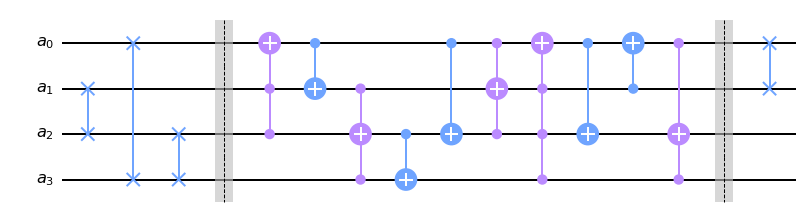

In [26]:
#MI 4 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(1,2)
qc.swap(0,3)
qc.swap(2,3)
qc.barrier()
#--------------------
qc.ccx(2,1,0)
qc.cx(0,1)
qc.ccx(1,3,2)
qc.cx(2,3)
qc.cx(0,2)
qc.ccx(0,2,1)
qc.mcx([3,1,2],0)
qc.cx([0,1],[2,0])
qc.ccx(3,0,2)
#--------------------------
qc.barrier()
#qc.swap(2,3)
qc.swap(0,1)
MI_4=qc  
qc.draw('mpl')

In [27]:
op=truth_table(MI_4,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="0c843a762d5e19bf")

     ┌───┐ ░           ░ ┌───┐                         ┌───┐     ┌───┐      ░ »
q_0: ┤ X ├─░─────X─────░─┤ X ├──■──────────────■────■──┤ X ├──■──┤ X ├──■───░─»
     ├───┤ ░     │     ░ └─┬─┘┌─┴─┐            │  ┌─┴─┐└─┬─┘  │  └─┬─┘  │   ░ »
q_1: ┤ X ├─░──X──┼─────░───■──┤ X ├──■─────────┼──┤ X ├──■────┼────■────┼───░─»
     ├───┤ ░  │  │     ░   │  └───┘┌─┴─┐     ┌─┴─┐└─┬─┘  │  ┌─┴─┐     ┌─┴─┐ ░ »
q_2: ┤ X ├─░──X──┼──X──░───■───────┤ X ├──■──┤ X ├──■────■──┤ X ├─────┤ X ├─░─»
     ├───┤ ░     │  │  ░           └─┬─┘┌─┴─┐└───┘       │  └───┘     └─┬─┘ ░ »
q_3: ┤ X ├─░─────X──X──░─────────────■──┤ X ├────────────■──────────────■───░─»
     └───┘ ░           ░                └───┘                               ░ »
c: 4/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«           ┌─┐   
«q_0: ─X────┤M├───
«      │    └╥┘┌─┐
«q_1: ─X─────╫─┤M├
«     ┌─┐    ║ └╥┘
«q_2: ┤M├────╫──╫─
«     

## MI-5

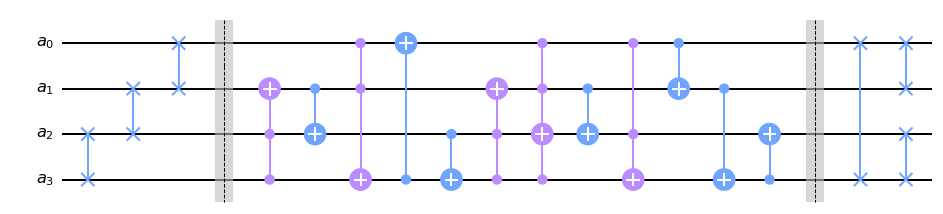

In [30]:
#MI 5 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(2,3)
qc.swap(1,2)
qc.swap(0,1)
qc.barrier()
#--------------------
qc.ccx(2,3,1)
qc.cx(1,2)
qc.ccx(1,0,3)
qc.cx(3,0)
qc.cx(2,3)
qc.ccx(3,2,1)
qc.mcx([0,1,3],2)
qc.cx(1,2)
qc.ccx(2,0,3)
qc.cx([0,1,3],[1,3,2])
#--------------------------
qc.barrier()
qc.swap(0,3)
qc.swap(0,1)
qc.swap(2,3)
MI_5=qc  
qc.draw('mpl')

In [31]:
op=truth_table(MI_5,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="021354edfbc9a768")

     ┌───┐ ░           ░                ┌───┐                              »
q_0: ┤ X ├─░────────X──░─────────────■──┤ X ├────────────■─────────■────■──»
     ├───┤ ░        │  ░ ┌───┐       │  └─┬─┘     ┌───┐  │         │  ┌─┴─┐»
q_1: ┤ X ├─░─────X──X──░─┤ X ├──■────■────┼───────┤ X ├──■────■────┼──┤ X ├»
     ├───┤ ░     │     ░ └─┬─┘┌─┴─┐  │    │       └─┬─┘┌─┴─┐┌─┴─┐  │  └───┘»
q_2: ┤ X ├─░──X──X─────░───■──┤ X ├──┼────┼────■────■──┤ X ├┤ X ├──■───────»
     ├───┤ ░  │        ░   │  └───┘┌─┴─┐  │  ┌─┴─┐  │  └─┬─┘└───┘┌─┴─┐     »
q_3: ┤ X ├─░──X────────░───■───────┤ X ├──■──┤ X ├──■────■───────┤ X ├─────»
     └───┘ ░           ░           └───┘     └───┘               └───┘     »
c: 4/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                ░       ┌─┐         
«q_0: ───────────░──X──X─┤M├─────────
«                ░  │  │ └╥┘┌─┐      
«q_1: ──■────────░──┼──X──╫─┤M├──────
«

## MI-6

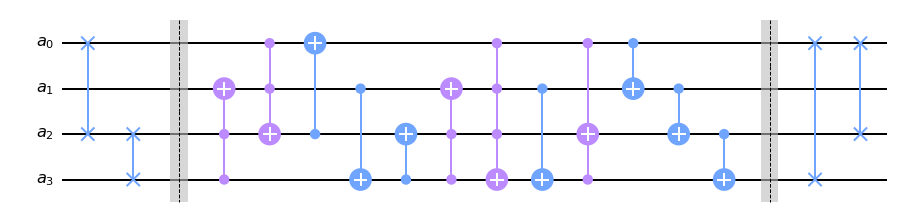

In [32]:
#MI 6 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse

qc.swap(0,2)
qc.swap(2,3)
qc.barrier()
#--------------------
qc.ccx(2,3,1)
qc.ccx(1,0,2)
qc.cx(2,0)
qc.cx(1,3)
qc.cx(3,2)
qc.ccx(3,2,1)
qc.mcx([0,1,2],3)
qc.cx(1,3)
qc.ccx(3,0,2)
qc.cx([0,1,2],[1,2,3])
#--------------------------
qc.barrier()
qc.swap(0,3)
qc.swap(0,2)
MI_6=qc  
qc.draw('mpl')

In [33]:
op=truth_table(MI_6,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="0213fc76ad8e59b4")

     ┌───┐ ░        ░           ┌───┐                                        »
q_0: ┤ X ├─░──X─────░────────■──┤ X ├─────────────────■─────────■────■───────»
     ├───┤ ░  │     ░ ┌───┐  │  └─┬─┘          ┌───┐  │         │  ┌─┴─┐     »
q_1: ┤ X ├─░──┼─────░─┤ X ├──■────┼────■───────┤ X ├──■────■────┼──┤ X ├──■──»
     ├───┤ ░  │     ░ └─┬─┘┌─┴─┐  │    │  ┌───┐└─┬─┘  │    │  ┌─┴─┐└───┘┌─┴─┐»
q_2: ┤ X ├─░──X──X──░───■──┤ X ├──■────┼──┤ X ├──■────■────┼──┤ X ├─────┤ X ├»
     ├───┤ ░     │  ░   │  └───┘     ┌─┴─┐└─┬─┘  │  ┌─┴─┐┌─┴─┐└─┬─┘     └───┘»
q_3: ┤ X ├─░─────X──░───■────────────┤ X ├──■────■──┤ X ├┤ X ├──■────────────»
     └───┘ ░        ░                └───┘          └───┘└───┘               »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«           ░          ┌─┐   
«q_0: ──────░──X─────X─┤M├───
«           ░  │ ┌─┐ │ └╥┘   
«q_1: ──────░──┼─┤M├─┼──╫────
«          

## MI-7

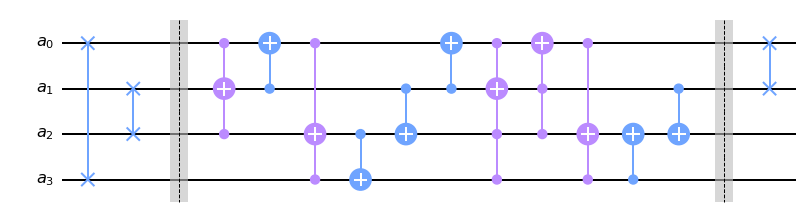

In [36]:
#MI 7 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse

qc.swap(0,3)
qc.swap(1,2)
qc.barrier()
#--------------------
qc.ccx(2,0,1)
qc.cx(1,0)
qc.ccx(3,0,2)
qc.cx(2,3)
qc.cx(1,2)
qc.cx(1,0)
qc.mcx([0,3,2],1)
qc.ccx(2,1,0)
qc.ccx(3,0,2)
qc.cx([3,1],[2,2])
#--------------------------
qc.barrier()
qc.swap(0,1)
MI_7=qc  
qc.draw('mpl')

In [37]:
op=truth_table(MI_7,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="0c84359b26f71eda")

     ┌───┐ ░        ░      ┌───┐               ┌───┐     ┌───┐               »
q_0: ┤ X ├─░──X─────░───■──┤ X ├──■────────────┤ X ├──■──┤ X ├──■────────────»
     ├───┤ ░  │     ░ ┌─┴─┐└─┬─┘  │            └─┬─┘┌─┴─┐└─┬─┘  │            »
q_1: ┤ X ├─░──┼──X──░─┤ X ├──■────┼─────────■────■──┤ X ├──■────┼─────────■──»
     ├───┤ ░  │  │  ░ └─┬─┘     ┌─┴─┐     ┌─┴─┐     └─┬─┘  │  ┌─┴─┐┌───┐┌─┴─┐»
q_2: ┤ X ├─░──┼──X──░───■───────┤ X ├──■──┤ X ├───────■────■──┤ X ├┤ X ├┤ X ├»
     ├───┤ ░  │     ░           └─┬─┘┌─┴─┐└───┘       │       └─┬─┘└─┬─┘└───┘»
q_3: ┤ X ├─░──X─────░─────────────■──┤ X ├────────────■─────────■────■───────»
     └───┘ ░        ░                └───┘                                   »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«      ░       ┌─┐   
«q_0: ─░──X────┤M├───
«      ░  │    └╥┘┌─┐
«q_1: ─░──X─────╫─┤M├
«      ░ ┌─┐    ║ └╥┘
«q_2: ─░─┤M├────╫──╫─

## MI-8

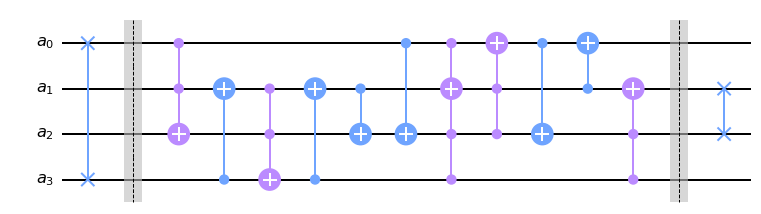

In [43]:
#MI 8 AS PER GF(2^4) INVERSION LIST
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse

qc.swap(0,3)
qc.barrier()
#--------------------
qc.ccx(1,0,2)
qc.cx(3,1)
qc.ccx(2,1,3)
qc.cx(3,1)
qc.cx(1,2)
qc.cx(0,2)
qc.mcx([0,3,2],1)
qc.ccx(2,1,0)
qc.cx([0,1],[2,0])
qc.ccx(3,2,1)
#--------------------------
qc.barrier()
qc.swap(1,2)
MI_8=qc  
qc.draw('mpl')

In [44]:
op=truth_table(MI_8,4,4,list(np.arange(4)))
print(op.values())
con=''.join(map(str, list(op.values())))

print(con=="084c25ed1bf9376a")

     ┌───┐ ░     ░                                    ┌───┐     ┌───┐      ░ »
q_0: ┤ X ├─░──X──░───■────────────────────────■────■──┤ X ├──■──┤ X ├──────░─»
     ├───┤ ░  │  ░   │  ┌───┐     ┌───┐       │  ┌─┴─┐└─┬─┘  │  └─┬─┘┌───┐ ░ »
q_1: ┤ X ├─░──┼──░───■──┤ X ├──■──┤ X ├──■────┼──┤ X ├──■────┼────■──┤ X ├─░─»
     ├───┤ ░  │  ░ ┌─┴─┐└─┬─┘  │  └─┬─┘┌─┴─┐┌─┴─┐└─┬─┘  │  ┌─┴─┐     └─┬─┘ ░ »
q_2: ┤ X ├─░──┼──░─┤ X ├──┼────■────┼──┤ X ├┤ X ├──■────■──┤ X ├───────■───░─»
     ├───┤ ░  │  ░ └───┘  │  ┌─┴─┐  │  └───┘└───┘  │       └───┘       │   ░ »
q_3: ┤ X ├─░──X──░────────■──┤ X ├──■──────────────■───────────────────■───░─»
     └───┘ ░     ░           └───┘                                         ░ »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«        ┌─┐      
«q_0: ───┤M├──────
«        └╥┘┌─┐   
«q_1: ─X──╫─┤M├───
«      │  ║ └╥┘┌─┐
«q_2: ─X──╫──╫─┤M├
«     ┌─┐ ║  ║ └╥